<h1 style="text-align: center;"> Lab Ex. 2: Regression Analysis</h1>

<h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

<h2 style="text-align: center;">Registration Number: 2448040 </h2>

### Import libraries:

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats as stats

### Data Acquisition and About Dataset:

In [12]:
df_salary=pd.read_csv("D:/lab 2/salary.csv")

In [13]:
df_salary.head() #Showing the first five values

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [14]:
print("No. of Records:",df_salary.shape[0])   #Gives the number of rows
print("No. of Features:", df_salary.shape[1]) #Gives the number of columns
print('Features:', df_salary.columns)         #Gives the names of the columns

No. of Records: 6704
No. of Features: 2
Features: Index(['Years of Experience', 'Salary'], dtype='object')


In [15]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


# Data preprocessing:

### Checking if missing values are present:

In [16]:
#Count if missing values are present:
missing_values=df_salary.isnull().sum()
#Show columns with missing values
print(missing_values)

Years of Experience    3
Salary                 5
dtype: int64


### Dropping missing values:

In [17]:
df_salary = df_salary.dropna(subset="Years of Experience")

In [18]:
df_salary["Salary"] = df_salary.groupby("Years of Experience")["Salary"].transform(lambda x: x.fillna(x.median()))

In [19]:
df_salary.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

### Visualizing Salary by Years of Experience:

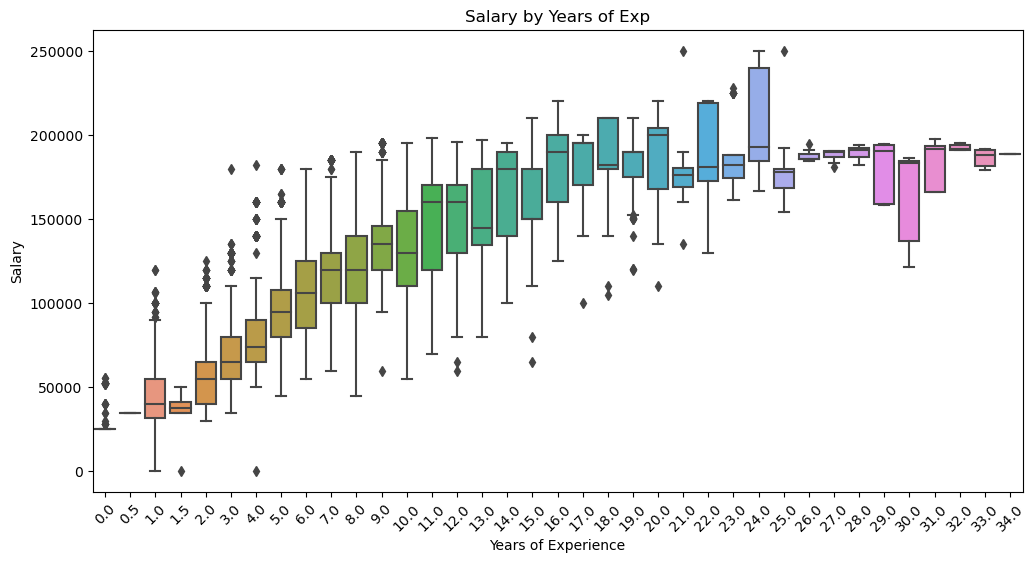

In [20]:
# Visualize Salary by Years of Experience 
plt.figure(figsize=(12, 6))
sb.boxplot(x='Years of Experience', y='Salary', data=df_salary)
plt.xticks(rotation=45)
plt.title('Salary by Years of Exp')
plt.show()

### Handling outliers:

In [21]:
# Finding outliers in Salary if any

Q1 = df_salary["Salary"].quantile(0.25)
Q3 = df_salary["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_salary[(df_salary["Salary"] < lower_bound) | (df_salary["Salary"] > upper_bound)]
print(f"Number of outliers in Salary: {len(outliers)}")

Number of outliers in Salary: 0


# Checking assumptions for fitting Simple Linear Regression model:

### (i) Linearity: Checking if the relationship between X(Years of experience) and Y(Salary) is linear.

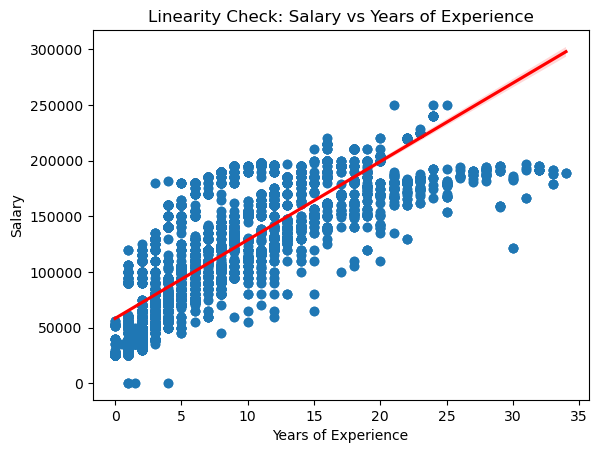

In [23]:
plt.scatter(df_salary["Years of Experience"], df_salary["Salary"])
sb.regplot(x=df_salary["Years of Experience"], y=df_salary["Salary"], scatter=True, line_kws={"color": "red"})
plt.title("Linearity Check: Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Spliting train and test dataset:

In [26]:
X = df_salary["Years of Experience"]   # Independent variable
y = df_salary["Salary"]                # Dependent Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Size of the Train and Test dataset
print('Train Set:',X_train.shape[0])
print('Test Set',X_test.shape[0])

Train Set: 5360
Test Set 1341


### Model building:

In [27]:
# Train model

lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [28]:
# Print the intercept and coefficients
print('Intercept = ', lr.intercept_)
print('Coefficient = ', lr.coef_)

Intercept =  58025.84106252243
Coefficient =  [7106.08511574]


In [29]:
print('Simple Linear Regression Model is ', 'Y = ', lr.coef_, 'X + ', lr.intercept_)

Simple Linear Regression Model is  Y =  [7106.08511574] X +  58025.84106252243


### Checking other assumption:

### (ii) Normality: Residuals (errors) should follow normal distribution.

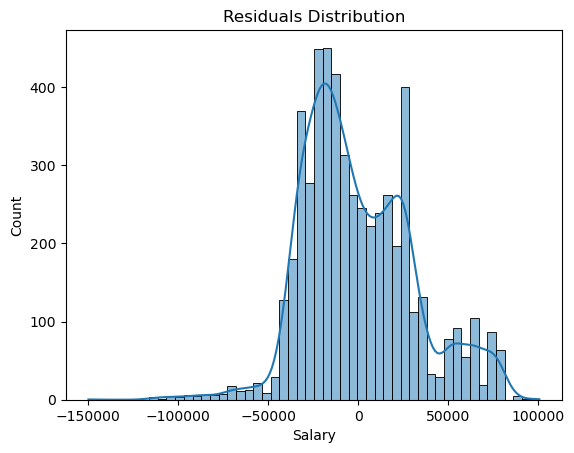

In [31]:
y_pred = lr.predict(X_train.values.reshape(-1,1))
residuals = y_train - y_pred

# Histogram
sb.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

### (iii) Homoscedasticity:

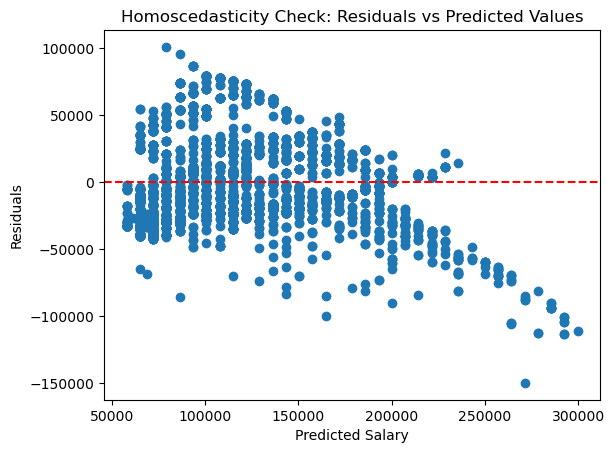

In [32]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Homoscedasticity Check: Residuals vs Predicted Values")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()

### Interpretation:
    If there is no clear pattern (e.g., funnel shape) and the points are randomly scattered around zero, homoscedasticity holds.

### Prediction of Test Dataset:

In [33]:
y_pred = lr.predict(X_test.values.reshape(-1,1))
# Print the predicted values
print("Prediction for test set:",y_pred)

Prediction for test set: [100662.35175694  72238.011294    79344.09640973 ... 107768.43687268
  79344.09640973 264102.30941888]


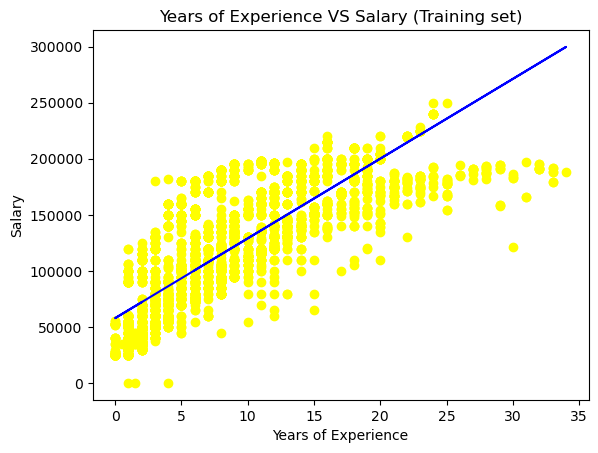

In [34]:
plt.scatter(X_train, y_train, color = "yellow")
plt.plot(X_train, lr.predict(np.array(X_train).reshape(-1,1)), color = "blue")
plt.title("Years of Experience VS Salary (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Evaluation of the model:

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('R2 Square = ', r_squared)

Mean Absolute Error =  24808.472682178926
Mean Absolute Percentage Error =  0.3711392903033447
Mean Squared Error =  967644819.8408172
Root Mean Squared Error =  31106.989887175154
R2 Square =  0.6441378333679815


### Vizualizing error:

Text(0, 0.5, 'Predicted')

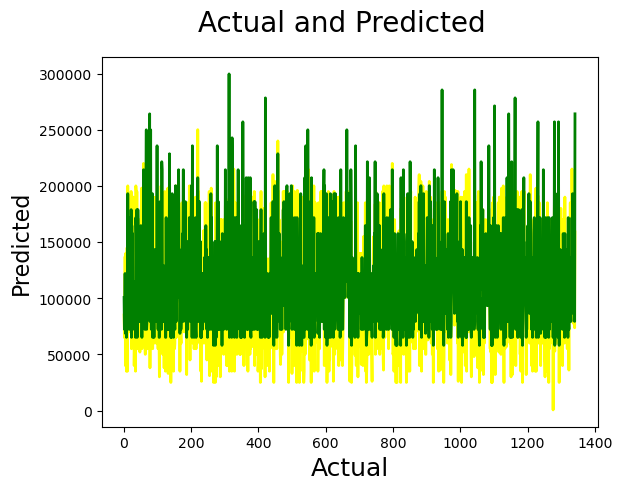

In [37]:
# Actual vs Predicted

c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="yellow", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="green",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)

### Prediction Salary:

In [38]:
new_rec = np.array([47]) #new record
print('Predicted Sales is:')
lr.predict(new_rec.reshape(-1,1))

Predicted Sales is:


array([392011.84150213])